### Objective- To find which variables does influence in the bank loan approval.

In [2]:
#Importing the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn


In [15]:
#Importing the dataset.
dataset=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
dataset.shape

(5000, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Interpretation**
1. The dataset contains 5000 observation and 14 variables.
2. Variables like **ID, Family** and **ZIP Code** can be dropped.


In [17]:
dataset.drop(["ID"], axis=1, inplace=True)
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
dataset1= dataset.drop(["ZIP Code","Family"], axis=1)
dataset1.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,1,0,0,1,0,0,0
1,45,19,34,1.5,1,0,0,1,0,0,0
2,39,15,11,1.0,1,0,0,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0,0,1


In [19]:
#checking for null value
dataset1.isna().sum()

Age                   0
Experience            0
Income                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [30]:
dataset1.describe()

,Age,Experience,Income,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [31]:
dataset1.shape

(5000, 11)

### Performing Exploratory Data analysis

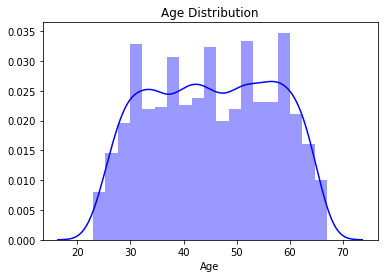

In [21]:
sn.distplot(dataset1["Age"], color="Blue")
plt.title("Age Distribution")
plt.show();

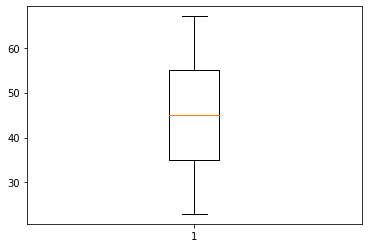

In [22]:
plt.boxplot(dataset1["Age"])
plt.show();

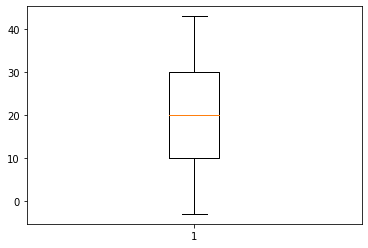

In [23]:
plt.boxplot(dataset1["Experience"])
plt.show();

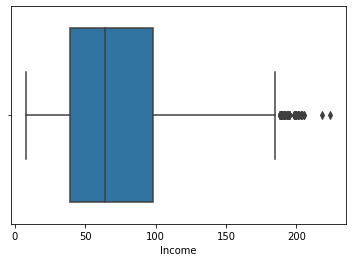

In [26]:
sn.boxplot(dataset1["Income"])

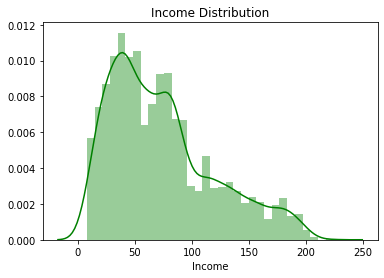

In [27]:
sn.distplot(dataset1["Income"],color="Green")
plt.title("Income Distribution")
plt.show();

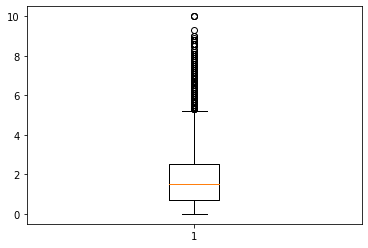

In [28]:
plt.boxplot(dataset1["CCAvg"])
plt.show();

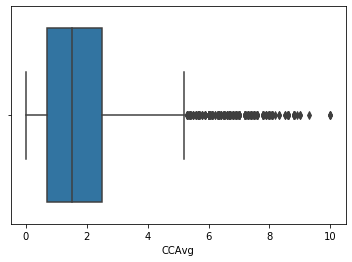

In [29]:
sn.boxplot(dataset1["CCAvg"])

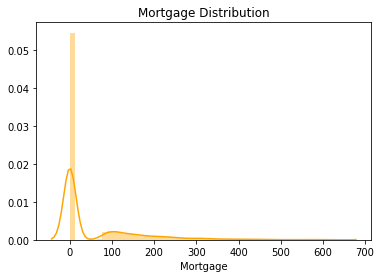

In [32]:
sn.distplot(dataset1["Mortgage"],color="Orange")
plt.title("Mortgage Distribution")
plt.show();

In [33]:
dataset1.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

**Inference**
1. Most of the binary categorail variable are encoded accordinlgy and the variables are **Personal Loan,Securities Account,CD Account,Online, CreditCard**
2. Outliers are in variables **CCAvg, Income**
3. The variable **Mortgage** Is Right Skewed.

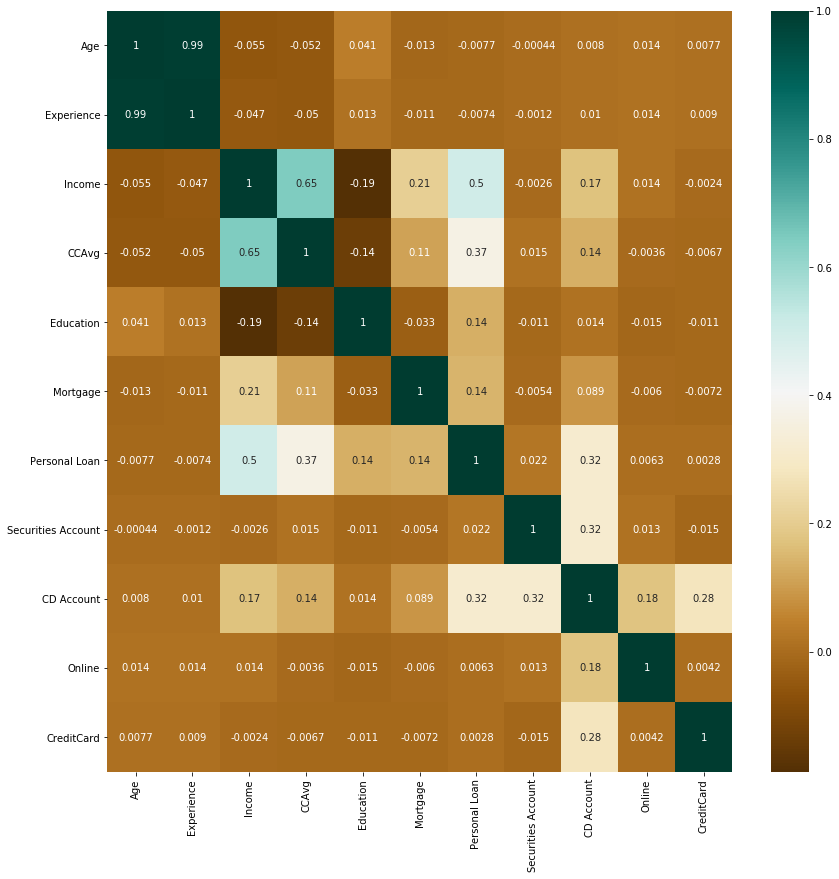

In [36]:
#Building the Correlation Table.
Corrmat=dataset1.corr()
top_feature=Corrmat.index
plt.figure(figsize=(14,14))
#plotting HeatMap
g=sn.heatmap(dataset1[top_feature].corr(), annot=True,cmap= "BrBG")


**Inference**

The Personal Loan variable has Good correlation with **Income, CCAvg and CD Account** and moderate correlation exists with variable **Education and Mortgage**

### Splitting the dataset.

In [40]:
y=dataset1.iloc[:,6:7]
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [41]:
x=dataset1.drop(['Personal Loan'], axis=1)
x.head()

,Age,Experience,Income,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,1.6,1,0,1,0,0,0
1,45,19,34,1.5,1,0,1,0,0,0
2,39,15,11,1.0,1,0,0,0,0,0
3,35,9,100,2.7,2,0,0,0,0,0
4,35,8,45,1.0,2,0,0,0,0,1


## Doing the train_test_split

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)

#### Logistic Regression Sklearn model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
le=LogisticRegression()
model=le.fit(x_train,y_train)
y_pred=le.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is", acc)
conf=confusion_matrix(y_test,y_pred)
print("Confusion matrix\n")
print(conf)

Accuracy of the model is 95.28
Confusion matrix

[[1129   13]
 [  46   62]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Logistic Regression OSL Model

In [49]:
import statsmodels.api as sm
x1=sm.add_constant(x)
log=sm.Logit(y,x1)
result=log.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.138253
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Thu, 22 Oct 2020   Pseudo R-squ.:                  0.5628
Time:                        19:06:02   Log-Likelihood:                -691.27
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.0362      1.561     -6.430      0.000     -13.096      -6.977
Age                   -0.0517      0.060     -0.867      0.386      -0.168       0.065
Experience             0.0573      0.059      0.965      0.335      -0.059       0.174
Income                 0.0494      0.002     20.934      0.000       0.045       0.054
CCAvg                  0.1217      0.038      3.222      0.001       0.048       0.196
Education              1.8167      0.111     16.313      0.000       1.598       2.035
Mortgage               0.0006      0.001      1.197      0.231      -0.000       0.002
Securities Account    -0.9755      0.277     -3.516      0.000      -1.519      -0.432
CD Account             3.7486      0.305     12.297      0.000       3.151       4.346
Online                -0.6388      0.152     -4.200      0.000      -0.937      -0.341
CreditCard            -1.1113      0.199     -5.595      0.000      -1.501      -0.722
======================================================================================
"""

**Inference**
1. With respect to the P Value the most prominent variables the affect loan approval are **Income, CCAvg, Education, Securities Account, CD Account, Online, CreditCard**
2. The logistic Equation can be written as-
**Personal Loan=-10.0362+(-0.0517)Age+0.0573Experience+0.0494Income+0.1217CCAvg+1.8167Education+0.0006Mortgage+(-0.9755)SecuritiesAccount+3.74CD Account+(-0.6388)Online+(-1.1113)CreditCard**
3. From the model evaulation this model gives 95.28% accuarcy score.